<h1 align="center"><font size="5">IBM Capstone Project - Car accident severity</font></h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O Data_Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-21 15:41:52--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data_Collisions.csv’

100%[======================================>] 73,917,638  3.19MB/s   in 18s    

2020-09-21 15:42:11 (3.86 MB/s) - ‘Data_Collisions.csv’ saved [73917638/73917638]



In [3]:
df= pd.read_csv('Data_Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
df_opt=df[['OBJECTID','SEVERITYCODE', 'JUNCTIONTYPE', 'PERSONCOUNT', 'WEATHER', 'ROADCOND','LIGHTCOND']]
df_opt.head()


,OBJECTID,SEVERITYCODE,JUNCTIONTYPE,PERSONCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,1,2,At Intersection (intersection related),2,Overcast,Wet,Daylight
1,2,1,Mid-Block (not related to intersection),2,Raining,Wet,Dark - Street Lights On
2,3,1,Mid-Block (not related to intersection),4,Overcast,Dry,Daylight
3,4,1,Mid-Block (not related to intersection),3,Clear,Dry,Daylight
4,5,2,At Intersection (intersection related),2,Raining,Wet,Daylight


In [8]:
df_opt.dtypes

OBJECTID         int64
SEVERITYCODE     int64
JUNCTIONTYPE    object
PERSONCOUNT      int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [9]:
df_opt.columns

Index(['OBJECTID', 'SEVERITYCODE', 'JUNCTIONTYPE', 'PERSONCOUNT', 'WEATHER',
       'ROADCOND', 'LIGHTCOND'],
      dtype='object')

## Exploraotry Data Analysis

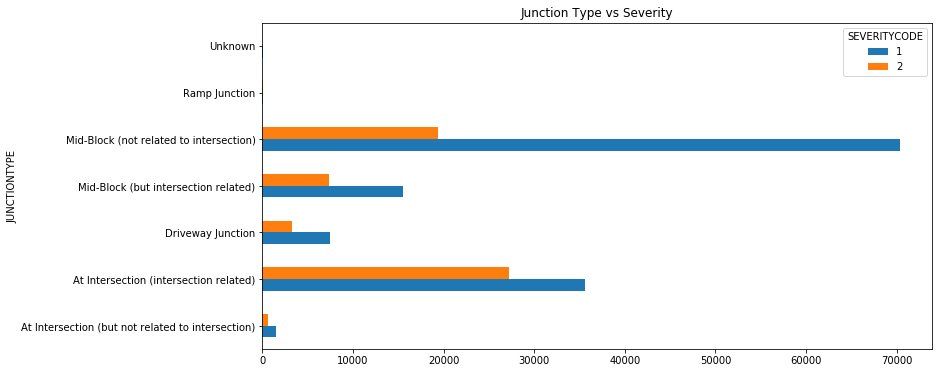

In [10]:
# JUNCTIONTYPE vs SEVERITYCODE
df_mod = df_opt[['OBJECTID','SEVERITYCODE','JUNCTIONTYPE']].groupby(['JUNCTIONTYPE','SEVERITYCODE']).count().reset_index()
df_viz = df_mod.pivot(index='JUNCTIONTYPE', columns='SEVERITYCODE') ['OBJECTID']

df_viz.plot(kind='barh',figsize=(12,6))
plt.title('Junction Type vs Severity')
plt.show()

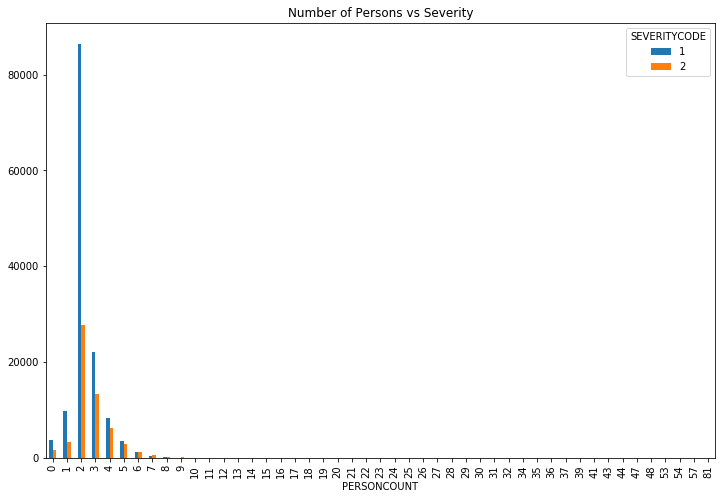

In [11]:
# PERSONCOUNT vs SEVERITYCODE 

df_mod = df_opt[['OBJECTID','SEVERITYCODE','PERSONCOUNT']].groupby(['PERSONCOUNT','SEVERITYCODE']).count().reset_index()
df_viz = df_mod.pivot(index='PERSONCOUNT', columns='SEVERITYCODE') ['OBJECTID']

df_viz.plot(kind='bar',figsize=(12,8))
plt.title('Number of Persons vs Severity')
plt.show()

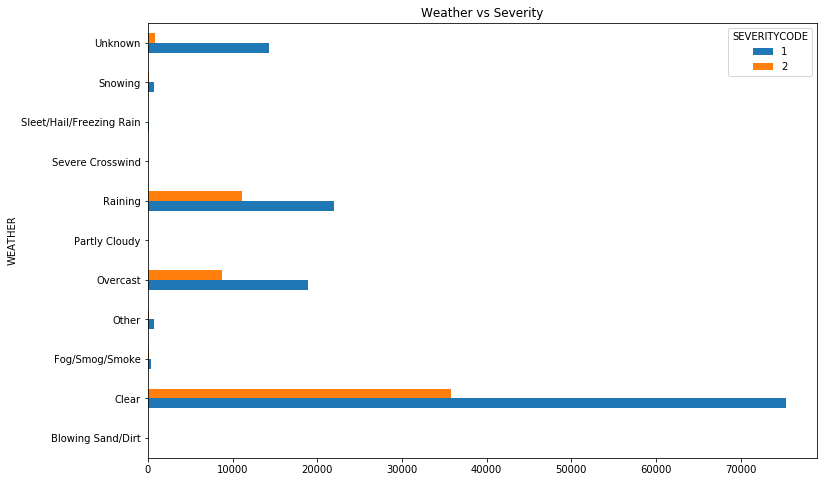

In [12]:
# WEATHER vs SEVERITYCODE

df_mod = df_opt[['OBJECTID','SEVERITYCODE','WEATHER']].groupby(['WEATHER','SEVERITYCODE']).count().reset_index()
df_viz = df_mod.pivot(index='WEATHER', columns='SEVERITYCODE') ['OBJECTID']

df_viz.plot(kind='barh',figsize=(12,8))
plt.title('Weather vs Severity')
plt.show()

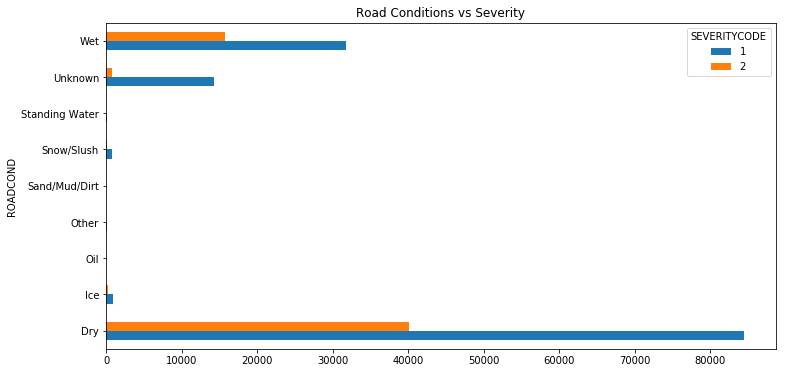

In [13]:
#ROADCOND vs SEVERITYCODE

df_mod = df_opt[['OBJECTID','SEVERITYCODE','ROADCOND']].groupby(['ROADCOND','SEVERITYCODE']).count().reset_index()
df_viz = df_mod.pivot(index='ROADCOND', columns='SEVERITYCODE') ['OBJECTID']

df_viz.plot(kind='barh',figsize=(12,6))
plt.title('Road Conditions vs Severity')
plt.show()

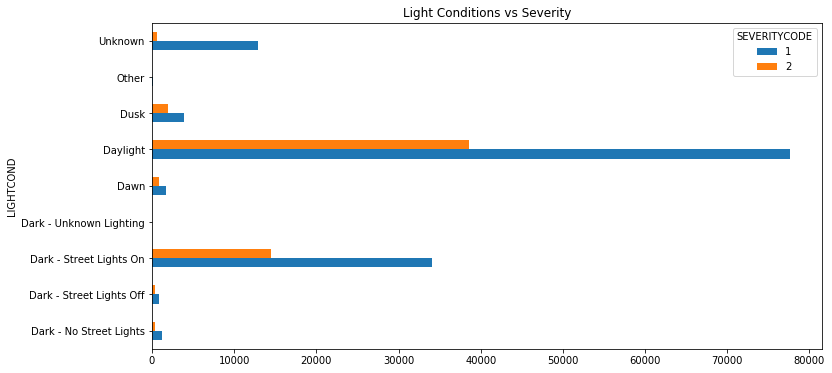

In [14]:
# LIGHTCOND vs SEVERITY 
df_mod = df_opt[['OBJECTID','SEVERITYCODE','LIGHTCOND']].groupby(['LIGHTCOND','SEVERITYCODE']).count().reset_index()
df_viz = df_mod.pivot(index='LIGHTCOND', columns='SEVERITYCODE') ['OBJECTID']

df_viz.plot(kind='barh',figsize=(12,6))
plt.title('Light Conditions vs Severity')
plt.show()

## Data Pre-processing

In [15]:
df_final=df_opt[['SEVERITYCODE', 'JUNCTIONTYPE', 'PERSONCOUNT', 'WEATHER', 'ROADCOND','LIGHTCOND']]
df_final.head()

,SEVERITYCODE,JUNCTIONTYPE,PERSONCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,At Intersection (intersection related),2,Overcast,Wet,Daylight
1,1,Mid-Block (not related to intersection),2,Raining,Wet,Dark - Street Lights On
2,1,Mid-Block (not related to intersection),4,Overcast,Dry,Daylight
3,1,Mid-Block (not related to intersection),3,Clear,Dry,Daylight
4,2,At Intersection (intersection related),2,Raining,Wet,Daylight


In [16]:
df_final.groupby(['SEVERITYCODE'])['JUNCTIONTYPE'].value_counts(normalize=True).to_frame()

JUNCTIONTYPE
SEVERITYCODE JUNCTIONTYPE                                                   
1            Mid-Block (not related to intersection)                0.539202
             At Intersection (intersection related)                 0.272956
             Mid-Block (but intersection related)                   0.118669
             Driveway Junction                                      0.056964
             At Intersection (but not related to intersection)      0.011298
             Ramp Junction                                          0.000858
             Unknown                                                0.000054
2            At Intersection (intersection related)                 0.470236
             Mid-Block (not related to intersection)                0.335779
             Mid-Block (but intersection related)                   0.126272
             Driveway Junction                                      0.055963
             At Intersection (but not related to intersection)      0.010781
             Ramp Junction                                          0.000934
             Unknown                                                0.000035

In [17]:
df_final['JUNCTIONTYPE'].replace(to_replace=['At Intersection (intersection related)','Mid-Block (not related to intersection)','Mid-Block (but intersection related)','Driveway Junction', 
                                             'At Intersection (but not related to intersection)','Ramp Junction','Unknown'], 
                                 value=[0,1,2,3,4,5,6],
                                 inplace=True)
df_final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,JUNCTIONTYPE,PERSONCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,0.0,2,Overcast,Wet,Daylight
1,1,1.0,2,Raining,Wet,Dark - Street Lights On
2,1,1.0,4,Overcast,Dry,Daylight
3,1,1.0,3,Clear,Dry,Daylight
4,2,0.0,2,Raining,Wet,Daylight


In [18]:
df_final.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True).to_frame()

WEATHER
SEVERITYCODE WEATHER                           
1            Clear                     0.568316
             Raining                   0.165819
             Overcast                  0.143175
             Unknown                   0.107746
             Snowing                   0.005555
             Other                     0.005404
             Fog/Smog/Smoke            0.002883
             Sleet/Hail/Freezing Rain  0.000642
             Blowing Sand/Dirt         0.000309
             Severe Crosswind          0.000136
             Partly Cloudy             0.000015
2            Clear                     0.627627
             Raining                   0.195713
             Overcast                  0.153142
             Unknown                   0.014290
             Fog/Smog/Smoke            0.003275
             Snowing                   0.002995
             Other                     0.002031
             Sleet/Hail/Freezing Rain  0.000490
             Blowing Sand/Dirt         0.000263
             Severe Crosswind          0.000123
             Partly Cloudy             0.000053

In [19]:
df_final['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Fog/Smog/Smoke','Snowing','Other','Sleet/Hail/Freezing Rain',
                                        'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'], 
                                 value=[0,1,2,3,4,5,6,7,8,9,10],
                                 inplace=True)
df_final.head()

,SEVERITYCODE,JUNCTIONTYPE,PERSONCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,0.0,2,2.0,Wet,Daylight
1,1,1.0,2,1.0,Wet,Dark - Street Lights On
2,1,1.0,4,2.0,Dry,Daylight
3,1,1.0,3,0.0,Dry,Daylight
4,2,0.0,2,1.0,Wet,Daylight


In [20]:
df_final.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True).to_frame()

ROADCOND
SEVERITYCODE ROADCOND                
1            Dry             0.637170
             Wet             0.239329
             Unknown         0.108116
             Ice             0.007062
             Snow/Slush      0.006315
             Other           0.000672
             Standing Water  0.000641
             Sand/Mud/Dirt   0.000392
             Oil             0.000302
2            Dry             0.701302
             Wet             0.275784
             Unknown         0.013111
             Ice             0.004779
             Snow/Slush      0.002923
             Other           0.000753
             Standing Water  0.000525
             Oil             0.000420
             Sand/Mud/Dirt   0.000403

In [21]:
df_final['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Oil','Sand/Mud/Dirt'], 
                                 value=[0,1,2,3,4,5,6,7,8],
                                 inplace=True)
df_final.head()

,SEVERITYCODE,JUNCTIONTYPE,PERSONCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,0.0,2,2.0,1.0,Daylight
1,1,1.0,2,1.0,1.0,Dark - Street Lights On
2,1,1.0,4,2.0,0.0,Daylight
3,1,1.0,3,0.0,0.0,Daylight
4,2,0.0,2,1.0,1.0,Daylight


In [22]:
df_final.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts(normalize=True).to_frame()

LIGHTCOND
SEVERITYCODE LIGHTCOND                          
1            Daylight                   0.586028
             Dark - Street Lights On    0.257030
             Unknown                    0.097187
             Dusk                       0.029893
             Dawn                       0.012673
             Dark - No Street Lights    0.009086
             Dark - Street Lights Off   0.006669
             Other                      0.001382
             Dark - Unknown Lighting    0.000053
2            Daylight                   0.675050
             Dark - Street Lights On    0.253512
             Dusk                       0.034047
             Dawn                       0.014431
             Unknown                    0.010596
             Dark - No Street Lights    0.005850
             Dark - Street Lights Off   0.005534
             Other                      0.000911
             Dark - Unknown Lighting    0.000070

In [23]:
df_final['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Dusk','Dawn','Unknown','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], 
                                 value=[0,1,2,3,4,5,6,7,8],
                                 inplace=True)
df_final.head()

,SEVERITYCODE,JUNCTIONTYPE,PERSONCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,0.0,2,2.0,1.0,0.0
1,1,1.0,2,1.0,1.0,1.0
2,1,1.0,4,2.0,0.0,0.0
3,1,1.0,3,0.0,0.0,0.0
4,2,0.0,2,1.0,1.0,0.0


### Balancing the Target Variable

In [24]:
df_final['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


This unbalanced data can be balanced by down-sampling the majority value.

In [25]:
from sklearn.utils import resample

In [26]:

df_majority = df_final[df_final.SEVERITYCODE==1]
df_minority = df_final[df_final.SEVERITYCODE==2]

df_down_sampled = resample(df_majority,
                          replace=False,
                          n_samples=58188,
                          random_state=123)

df_final_balanced = pd.concat([df_down_sampled, df_minority])

df_final_balanced['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
2,58188
1,58188


## Feature Engineering and Selection

In [27]:
df_final_balanced.columns

Index(['SEVERITYCODE', 'JUNCTIONTYPE', 'PERSONCOUNT', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

In [28]:
df_final_balanced.isna().sum()

SEVERITYCODE       0
JUNCTIONTYPE    2937
PERSONCOUNT        0
WEATHER         2816
ROADCOND        2764
LIGHTCOND       2848
dtype: int64

In [29]:
df_final_balanced.dropna(inplace=True)

In [30]:
df_final_balanced.isna().sum()

SEVERITYCODE    0
JUNCTIONTYPE    0
PERSONCOUNT     0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

In [31]:
df_final_balanced.shape

(110586, 6)

In [32]:
X= df_final_balanced[['JUNCTIONTYPE', 'PERSONCOUNT', 'WEATHER', 'ROADCOND','LIGHTCOND']]


In [33]:
y= df_final_balanced['SEVERITYCODE']

## Applying Machine Learning Algorithms

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (88468, 5) (88468,)
Test set: (22118, 5) (22118,)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score


### K Nearest Neighbor(KNN)

In [36]:
K=10
mean_acc = np.zeros((K-1)) #This function is equal to the jaccard_similarity_score function
ConfustionMx = [];

for n in range(1,K):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat= neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
print('jaccard similarity score of KNN:', mean_acc.max().round(2),'\n')
print('f1_score of KNN:', f1_score(y_test, yhat, average='macro').round(2))

jaccard similarity score of KNN: 0.59 

f1_score of KNN: 0.57


###  Support Vector Machine (SVM)

In [37]:
support_V = svm.SVC(kernel='rbf')

support_V.fit(X_train, y_train)

svm_hat = support_V.predict(X_test)

print('jaccard similarity score of Support Vector Machine:', jaccard_similarity_score(y_test,svm_hat).round(2), '\n')
print('f1_score score of Support Vector Machine:', f1_score(y_test, svm_hat, average='macro').round(2))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


jaccard similarity score of Support Vector Machine: 0.63 

f1_score score of Support Vector Machine: 0.63


### Decision Tree

In [39]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

DTree.fit(X_train,y_train)

predTree = DTree.predict(X_test)

print('jaccard similarity score of Decision Tree:', jaccard_similarity_score(y_test,predTree).round(2),'\n')
print('f1_score score of Decision Tree:', f1_score(y_test,predTree,average='macro').round(2))

jaccard similarity score of Decision Tree: 0.63 

f1_score score of Decision Tree: 0.63


### LogisticRegression

In [41]:
LR = LogisticRegression(C=0.01, solver='liblinear')

LR.fit(X_train,y_train)

LR_hat = LR.predict(X_test)

print('jaccard similarity score of Logistic Regression:', jaccard_similarity_score(y_test,LR_hat).round(2), '\n')
print('f1_score score of Logistic Regression:', f1_score(y_test, LR_hat ,average='macro').round(2))

jaccard similarity score of Logistic Regression: 0.58 

f1_score score of Logistic Regression: 0.58


<h3 align="center"><font size="5">Accuracy of the various algorithms</font></h3>


| Algorithm          | Jaccard | F1-score | 
|--------------------|---------|----------|
| KNN                |    0.59     |  0.57        |
| Decision Tree      |      0.63   |    0.63      |
| SVM                |     0.63    |    0.63      |
| Logistic Regression|        0.58 |      0.58    | 